## Best Predictor in Predicting Tips: A STAT 301 Case Study Project

### Introduction

##### Data Description
This dataset is obtained from https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset.  
Collected from a popular restaurant over a specified period, this dataset looks into the tipping behavior in a restaurant setting. In this dataset, there are in total 244 observations, and 7 variables.    
Table of variables used:
| Variable Name | Discription | Type |
| :---: | :---: | :---: |
|total_bill| total bill amount in dollars|Numerical, independent variable|
|sex| Gender of the person paying the bill (Male/Female)|Categorical, independent variable|
|smoker|Whether the person is a smoker (Yes/No) |Categorical, independent variable|
|day|Day of the week when the transaction took place (Thur/Fri/Sat/Sun)|Categorical, independent variable|
|time|Time of day when the transaction took place (Lunch/Dinner)|Categorical, independent variable|
|size|Size of the dining party (number of people)|Numerical, independent variable|
|tip|Tip amount in dollars|Numerical, target variable|

##### Research Question

*Which set of input variables available in the tips dataset best explain the variation in the amount of tips?*

### Methods and Results

#### Exploratory Data Analysis (EDA)

In [4]:
# 
url <- "https://raw.githubusercontent.com/JustinTrenchcoat/STAT_301_Personal_Project/refs/heads/main/tips.csv"

tips_data <- read.csv(url(url), header = TRUE)
head(tips_data)
ncol <- ncol(tips_data)
norw <- nrow(tips_data)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


#### Methods: Plan

##### Method:
1. Data would be splited into two portions with rate of 70%-30%, to create a training set and selection set.
2. The backward selection algorithm is deployed to to construct a multiple linear regression model using the training set, and models with different set of explanatory varibables would be evaluated with AIC. 
3. The multiple $R^2$ will be used to evaluate the model by calculating the proportion of the variation in tips explained by the model when applied to the selection set.   

##### Justification of Method Used:
Given that we want to find out which set of explanatory variables from the total set given are significant for model-fitting and making inferences, starting off with the full set of available input variables and eliminating from there makes sense since there are only 6 input variables and the computational effort required is reasonable. Previous exploratory data analysis and subsequent discussion within the group have revealed that there is insufficient data for proper comparison within categories - for example, insufficient lunch and dinner data for certain days of the week. Hence, using a criterion that selects categorical variables as a whole rather than by specific levels would be better in this case because there is not enough information to accurately make such specific selections. A multiple linear regression is used because the response variable, amount of tips given, is a continuous variable and there are several input variables that are being taken into account. The adjusted $R^2$ is used for model evaluation because it evaluates the proportion of the variance of the amount of tips (response variable) explained by the model with penalisation to compensate for the model's size. This allows us to check if the model fits the data well enough for inferences to be made.

##### Assumptions required:
* There is a linear relationship between the response and input variables.
* Errors are independent of each other
* The conditional distribution of error terms is normal
* The variance of the error terms are approximately equal
* No multicollinearity exists among the variables

In [12]:
library(dplyr)
library(tidyverse)
library(broom)
library(repr)
library(ggplot2)
library(httr)
library(jsonlite)
library(MASS)

In [15]:
# Main developer: Jia Xin Tan
# Contributor: Jiaming Chang

# set up random see
set.seed(120)

# tidy the data: change the data type from strings to factors
tips_tidied <- tips_data |> 
    mutate(sex = factor(sex),
           smoker = factor(ifelse(smoker == "Yes", "Smoker", "Non-smoker")),
           day = factor(day),
           time = factor(time), 
           size = factor(size))

In [ ]:
# Main developer: Jia Xin Tan
# Contributor: Jiaming Chang

# Data splitting process: 
# 70% of the data is splitted from the whole dataset, stored as `tips_train`, and used for backward selection process.
# the other 30% of dataset is stored as `tips_select` for evaluation.
tips_sample <- 
    tips_tidied |>
    mutate(id = row_number())

tips_train <- tips_sample |> 
    slice_sample(prop = 0.7, replace = FALSE)

tips_select <- tips_sample |>
    anti_join(tips_train, by = "id")

tips_train <- tips_train |> 
    dplyr::select(- "id")

tips_select <- tips_select |>
    dplyr::select(- "id")

In [43]:
# Main developer: Jia Xin Tan
# Contributor: Jiaming Chang

# Backward selection process, the metric is BIC
tips_model <- lm(tip ~ ., data = tips_train)
n <- nrow(tips_train)
tips_null <- lm(tip ~ 1, data = tips_train)

# Run stepwise selection with BIC (k = log(n))
tips_bwd_bic <- stepAIC(tips_model, 
                       direction = "backward",
                       k = log(n), 
                       trace = 2)   # Set to 2 for detailed output
summary(tips_bwd_bic)

Start:  AIC=69.04
tip ~ total_bill + sex + smoker + day + time + size

             Df Sum of Sq    RSS     AIC
- size        5     4.316 176.60  47.563
- day         3     2.713 175.00  56.285
- time        1     0.037 172.32  63.937
- sex         1     0.039 172.32  63.939
- smoker      1     0.237 172.52  64.134
<none>                    172.29  69.036
- total_bill  1    65.548 237.83 118.711

Step:  AIC=47.56
tip ~ total_bill + sex + smoker + day + time

             Df Sum of Sq    RSS     AIC
- day         3     2.622 179.22  34.661
- time        1     0.015 176.62  42.442
- sex         1     0.190 176.79  42.611
- smoker      1     0.901 177.50  43.293
<none>                    176.60  47.563
- total_bill  1   120.388 296.99 130.793

Step:  AIC=34.66
tip ~ total_bill + sex + smoker + time

             Df Sum of Sq    RSS     AIC
- time        1     0.021 179.25  29.546
- sex         1     0.115 179.34  29.635
- smoker      1     2.326 181.55  31.718
<none>                    17


Call:
lm(formula = tip ~ total_bill, data = tips_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1506 -0.5715 -0.1240  0.4466  3.8546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.988626   0.200303   4.936 1.91e-06 ***
total_bill  0.101492   0.009329  10.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.04 on 168 degrees of freedom
Multiple R-squared:  0.4133,	Adjusted R-squared:  0.4099 
F-statistic: 118.4 on 1 and 168 DF,  p-value: < 2.2e-16


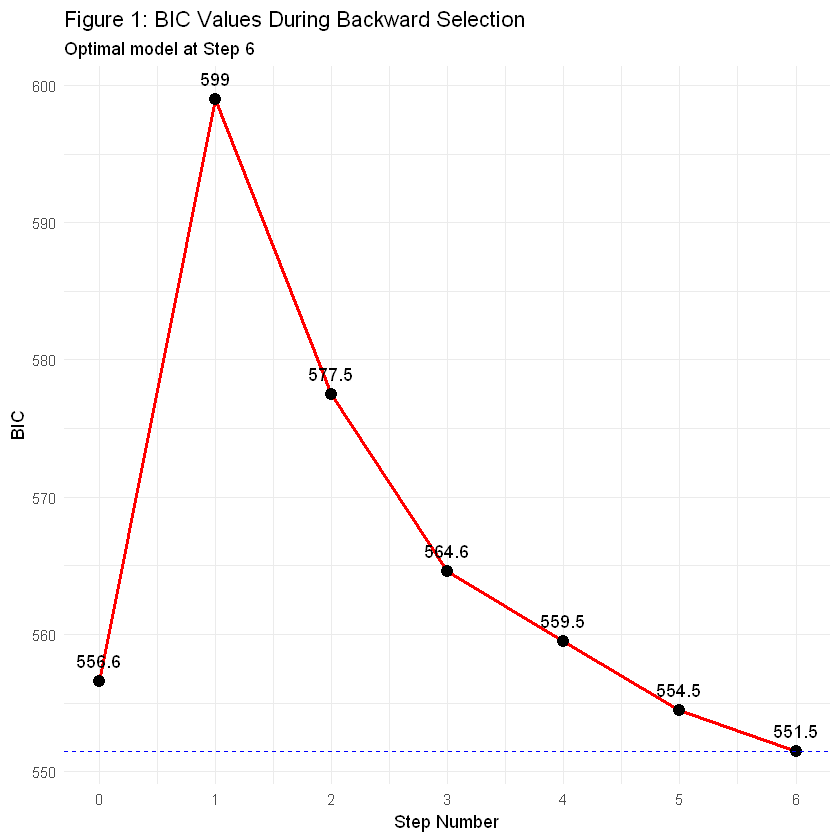

In [ ]:
# Main developer: Jiaming Chang
# Contributor: Jiaming Chang

# Extract BIC values for each step.
bic_values <- c(BIC(tips_model), tips_bwd_bic$anova$AIC + (log(n)-2)*(n-1))
plot_data <- data.frame(
  Step = 0:(length(bic_values)-1),
  BIC = bic_values
)

# Plot the steps and BIC value for stepwise selection
ggplot(plot_data, aes(x = Step, y = BIC)) +
  geom_line(color = "red", linewidth = 1) +
  geom_point(color = "black", size = 3) +
  geom_hline(yintercept = min(bic_values), linetype = "dashed", color = "blue") +
  labs(title = "Figure 1: BIC Values During Backward Selection",
       subtitle = paste("Optimal model at Step", which.min(bic_values)-1),
       x = "Step Number",
       y = "BIC") +
  theme_minimal() +
  scale_x_continuous(breaks = plot_data$Step) +
  geom_text(aes(label = round(BIC, 1)), vjust = -1)

In [45]:
# Main developer: Jia Xin Tan
# Contributor: Jiaming Chang

# Evaluate the model with the 30% of original dataset
tips_select_bwd <- lm(tip ~ total_bill, tips_select)
# print out information for this evaluation
tips_eval <- summary(tips_select_bwd)
tips_eval


Call:
lm(formula = tip ~ total_bill, data = tips_select)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3487 -0.5653 -0.0249  0.5179  3.1231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.79479    0.26596   2.988  0.00383 ** 
total_bill   0.11144    0.01199   9.293 5.96e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.991 on 72 degrees of freedom
Multiple R-squared:  0.5454,	Adjusted R-squared:  0.539 
F-statistic: 86.36 on 1 and 72 DF,  p-value: 5.956e-14


##### Interpretation of results:
As seen from the analysis above, the chosen model unexpectedly ends up as a single linear regression with only one input variable, total bill, chosen. The multiple R-squared is 0.5454, which means the total bill is associated with about 54.54% of the variation in tip amount - a moderate association. The fact that only total bill was selected could mean potential multicollinearity with the other input variables or that there is a lack of strong relationships between the other input variables and the amount of tips given. To improve the strength of association and address model concerns, carrying out further data analysis (for example, exploring potential significant relationships between input variables through adding interaction terms in the model) as well as using a larger, more comprehensive dataset would be ideal. 

### Discussion

### References

Badole, Saurabh. (2025, March). *Restaurant Tips Dataset*. Retrieved from [https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset](https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset)